<a href="https://colab.research.google.com/github/Pepperychef/algoritmos-optimizacion-2020/blob/main/Hern%C3%A1n_Palacios_AG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Guiada 2 de Algoritmos de Optimizacion
Hernán Palacios Domínguez

https://colab.research.google.com/drive/1xmFB4VmcYOFBhBMfiPdyx4gTXs7pb4Hz?usp=sharing

https://github.com/Pepperychef/algoritmos-optimizacion-2020

In [ ]:
#Viaje por el rio

In [1]:
import math

In [8]:
tarifas = [
[0,5,4,3,999,999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

In [11]:
def preciosDef(tarifas):
  #Total de Nodos
  N = len(tarifas[0])

  precios = [ [9999]*N for i in [9999]*N]  #n x n 
  ruta = [ [""]*N for i in [""]*N]
  
  for i in range(N-1):
    for j in range(i+1, N):
      minimo = tarifas[i][j]
      ruta[i][j] = i
      for k in range(i, j):
        if precios[i][k] + tarifas[k][j] < minimo:
            minimo = min(minimo, precios[i][k] + tarifas[k][j] )
            ruta[i][j] = k
        precios[i][j] = minimo
        
  return precios,ruta

In [12]:
precios,ruta = preciosDef(tarifas)  
#print(PRECIOS[0][6])

print("precios")
for i in range(len(tarifas)):
  print(precios[i])

print("\nRUTA")  
for i in range(len(tarifas)):
  print(ruta[i])

precios
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [13]:

def calcularRuta(ruta, desde, hasta):
  if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcularRuta(ruta, desde, ruta[desde][hasta])) +  ',' + str(ruta[desde][hasta]) 

print("\nLa ruta es:")  
calcularRuta(ruta, 0,6)




La ruta es:


'0,0,2,5'


##Problema de Asignacion de tarea

(Ramificación y poda)


In [14]:
costes=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]

In [15]:
def valorDef(S,costes):
  valor = 0
  for i in range(len(S)):
    valor += costes[S[i]][i] 
  return valor
  
valorDef((0, 1, 2, 3  ),costes)

73

In [17]:
def costeInferior(S,costes):
  valor = 0
  #Valores establecidos
  for i in range(len(S)):
    valor += costes[i][S[i]]

  #Estimacion
  for i in range( len(S), len(costes)   ):
    valor += min( [ costes[j][i] for j in range(len(S), len(costes))  ])
  return valor

def costeSuperior(S,costes):
  valor = 0
  #Valores establecidos
  for i in range(len(S)):
    valor += costes[i][S[i]]

  #Estimacion
  for i in range( len(S), len(costes)   ):
    valor += max( [ costes[j][i] for j in range(len(S), len(costes))  ])
  return valor

costeSuperior((0,1),costes)

74

In [18]:
def crearHijos(nodo, N):
  hijos = []
  for i in range(N ):
    if i not in nodo:
      hijos.append({'s':nodo +(i,)    })
  return hijos

In [23]:
def ramificacionPoda(costes):
  dimension = len(costes)  
  mejorSolucion=tuple( i for i in range(len(costes)) )
  CotaSup = valorDef(mejorSolucion,costes)
  #print("Cota Superior:", CotaSup)

  nodos=[]
  nodos.append({'s':(), 'ci':costeInferior((),costes)    } )

  iteracion = 0

  while( len(nodos) > 0):
    iteracion +=1

    nodo_prometedor = [ min(nodos, key=lambda x:x['ci']) ][0]['s']

    hijos =[ {'s':x['s'], 'ci':costeInferior(x['s'], costes)   } for x in crearHijos(nodo_prometedor, dimension) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    nodoFinal = [x for x in hijos if len(x['s']) == dimension  ]
    if len(nodoFinal ) >0: 
       if nodoFinal[0]['ci'] < CotaSup:
        CotaSup = nodoFinal[0]['ci']
        mejorSolucion = nodoFinal

    hijos = [x for x in hijos if x['ci'] < CotaSup   ]

    nodos.extend(hijos) 

    nodos =  [  x for x in nodos if x['s'] != nodo_prometedor    ]
   
  print("La solucion final es:" ,mejorSolucion , " en " , iteracion , " iteraciones" , " para dimension: " ,dimension  )
      


ramificacionPoda(costes)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


## Descenso del Gradiente

In [24]:
import math                     
import matplotlib.pyplot as plt  
import numpy as np               

import random

In [25]:
f  = lambda X:      X[0]**2+X[1]**2      
df = lambda X: [2*X[0] , 2*X[1]]        

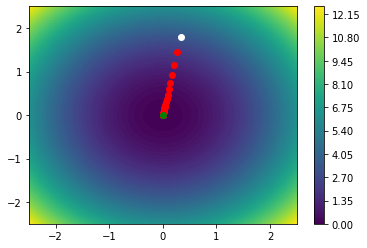

Solucion: [1.1849502080443532e-49, 6.325650227274049e-49] 4.1417957793356577e-97


In [26]:

resolucion = 100 
rango=2.5
X=np.linspace(-rango,rango,resolucion) 
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

plt.contourf(X,Y,Z,resolucion)
plt.colorbar() 

P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

TA=.1 

for _ in range(500):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))